In [5]:
import pandas as pd
import numpy as np

import importlib

import modCommon

from pandas_profiling import ProfileReport

#from pycaret.classification import *

In [11]:
importlib.reload(modCommon)

<module 'modCommon' from 'c:\\Users\\Chilelli\\Documents\\MBA\\TCC\\git\\modCommon.py'>

In [141]:
dfCustomer = pd.read_csv(modCommon.sCustomersFile) #
dfOrderItems = pd.read_csv(modCommon.sOrderItemsFile) #
dfOrderPay = pd.read_csv(modCommon.sOrderPaymentsFile) 
dfOrderReview = pd.read_csv(modCommon.sOrderReviewsFile) #
dfOrders = pd.read_csv(modCommon.sOrdersFile) #
dfProducts = pd.read_csv(modCommon.sProductsFile) #

In [142]:
# convertendo as datas em YYYY-MM-DD, ja que estavam em Timestamp
dfOrderItems['shipping_limit_date'] = pd.to_datetime(dfOrderItems['shipping_limit_date'], format = "%Y-%m-%d", errors='ignore').dt.date

ssColsToDate = [
       'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'
]
for sCol in ssColsToDate:
       dfOrders[sCol] = pd.to_datetime(dfOrders[sCol], format = "%Y-%m-%d", errors='ignore').dt.date

dfOrders = dfOrders[~dfOrders.order_status.isin(['canceled','unavailable'])]
# alguns reviews estao duplicados, todos apresentam a mesma nota quando estao duplicados, por isso o groupby
dfOrderReview = dfOrderReview.groupby(['order_id'], as_index = False)['review_score'].mean()

In [143]:
dfOrders = dfOrders.merge(dfCustomer, on = 'customer_id', how = 'left')
dfOrders = dfOrders.merge(dfOrderReview, on = 'order_id', how = 'left')
dfOrderItems = dfOrderItems.merge(dfProducts, on = 'product_id', how = 'left')
dfOrderItems = dfOrderItems.merge(dfOrders[['order_id', 'customer_unique_id', 'order_purchase_timestamp']], on = 'order_id', how = 'inner')
dfOrderPay = dfOrderPay.merge(dfOrders[['order_id', 'customer_unique_id', 'order_purchase_timestamp']], on = 'order_id', how = 'inner')

In [145]:
dfOrders.to_csv(modCommon.sRootPath + 'order_complete.csv', index = False)
dfOrderItems.to_csv(modCommon.sRootPath + 'order_items.csv', index = False)
dfOrderPay.to_csv(modCommon.sRootPath + 'oder_payments.csv', index = False)

In [107]:
profile = ProfileReport(dfOrders, title = "Orders")
profile.to_file("orders_complete.html")

profile = ProfileReport(dfOrderItems, title = "Orders Items")
profile.to_file("orders_items_complete.html")

profile = ProfileReport(dfOrderPay, title = "Orders Payments")
profile.to_file("orders_payments_complete.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 45.54it/s]


<AxesSubplot:>

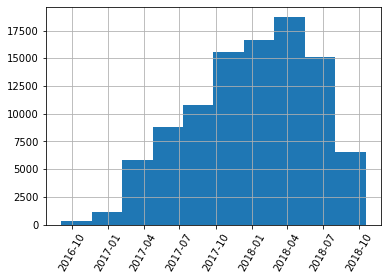

In [110]:
dfOrders.order_purchase_timestamp.hist(xrot = 60)

In [124]:
a = dfOrders.customer_unique_id.value_counts().to_frame()
a[a.customer_unique_id > 1].shape

(2997, 1)

In [126]:
a = dfOrderItems.product_id.value_counts().to_frame()
a[a.product_id > 1].shape

(14834, 1)

In [128]:
dfOrderItems.order_id

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
43143868203ea734e8de41d2dfd4097a     1
af15b02bd22fa4485130964ab9c97f4d     1
2d0d881aec191e67166a6447a62418d2     1
f1b1b5d6b3ec1564b2c5ac226d0d62c2     1
d2088349aa517876ebda33eec33406f1     1
Name: order_id, Length: 98666, dtype: int64

In [105]:
dfOrderItems[dfOrderItems.order_id == 'a8224a3529e84b453dd1681ad5788e61']

order_id  order_item_id  \
73772  a8224a3529e84b453dd1681ad5788e61              1   

                             product_id                         seller_id  \
73772  ebee6703e867082f455a058a8bd04092  fc906263ca5083d09dce42fe02247800   

      shipping_limit_date  price  freight_value product_category_name  
73772          2017-09-21   29.9          16.79        consoles_games

In [140]:
dfProducts

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [9]:
profile = ProfileReport(dfData, title="Pandas Profiling Report")
profile.to_file("customers.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 166.64it/s]


In [17]:
dfOrders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [21]:
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
